In [1]:
import pandas as pd
import numpy as np
import warnings
df = pd.read_csv('Champion_Data_Historical_Data.csv')

In [2]:
df.head(5)

,Month,Location,Budget,CPA,APPT.created,Conversion.ran,APPT.ran,Conversion.close,Orders,Average.ticket,Sales
0,1/1/2015,ALBANY,17931.0,717,25.0,1,20.0,0,6.0,4728.0,28366
1,2/1/2015,ALBANY,33143.0,571,58.0,1,50.0,0,13.0,12533.0,162931
2,3/1/2015,ALBANY,65600.0,820,80.0,1,70.0,0,17.0,12260.0,208416
3,4/1/2015,ALBANY,76460.0,490,156.0,1,143.0,0,43.0,7430.0,319473
4,5/1/2015,ALBANY,77819.0,894,87.0,1,106.0,0,23.0,12322.0,283405


In [3]:
df = df[df['Orders'] != 0]

In [4]:
print('Dropping Duplicate rows in dataframe',df.shape)
df.drop_duplicates(inplace=True, ignore_index=True)
print('Total Size of data after dropping duplicates',df.shape)

Dropping Duplicate rows in dataframe (1687, 11)
Total Size of data after dropping duplicates (1687, 11)


In [5]:
# Changing date column data type to date
df['Month'] = pd.to_datetime(df['Month'])
# Adding Year and Month Column
df['Year'] = df['Month'].dt.year
df['month'] = df['Month'].dt.month
#df['Date'] = df['Month'].dt.month

In [6]:
df.columns

Index(['Month', 'Location', 'Budget', 'CPA', 'APPT.created', 'Conversion.ran',
       'APPT.ran', 'Conversion.close', 'Orders', 'Average.ticket', 'Sales',
       'Year', 'month'],
      dtype='object')

In [7]:
df['Location'].nunique()

48

In [8]:
vc = df['Location'].value_counts().reset_index(name='Loc_freq') 
vc = vc.sort_values('Loc_freq', ascending=False)
vc.head(5)

,index,Loc_freq
0,CINCINNATI,37
1,DENVER,37
2,COLORADOSP,36
3,SOUTHBEND,36
4,MINNEAPOLIS,36


In [9]:
df.Location.unique()

array(['ALBANY', 'ALBUQUERQUE', 'ATLANTA', 'AUSTIN', 'BALTIMORE',
       'BIRMINGHAM', 'BOISE', 'CHARLOTTE', 'CHATTANOOGA', 'CHICAGO',
       'CINCINNATI', 'CLEVELAND', 'COLORADOSP', 'COLUMBIA', 'COLUMBUSOH',
       'DAYTON', 'DENVER', 'EVANSVILLE', 'FTCOLLINS', 'FTWORTH',
       'GRANDRAPIDS', 'GREENSBORO', 'HUNTSVILLE', 'INDIANAPOLIS',
       'JOHNSONCITY', 'KANSASCITY', 'LEXINGTON', 'LOUISVILLE', 'MACON',
       'MEMPHIS', 'MILWAUKEE', 'MINNEAPOLIS', 'NASHVILLE', 'OKLAHOMACITY',
       'OMAHA', 'PITTSBURGH', 'PORTLAND', 'RALEIGH', 'RICHMONDVA',
       'ROCHESTER', 'SALTLAKECITY', 'SANANTONIO', 'SEATTLE', 'SOUTHBEND',
       'STLOUIS', 'TOLEDO', 'TULSA', 'WICHITA'], dtype=object)

In [10]:
df['Month'].min()

Timestamp('2015-01-01 00:00:00')

In [11]:
df['Month'].max()

Timestamp('2018-12-01 00:00:00')

In [12]:
df['Conversion.close'].value_counts()

0    1644
1      43
Name: Conversion.close, dtype: int64

In [13]:
df.isna().sum()

Month               0
Location            0
Budget              3
CPA                 0
APPT.created        1
Conversion.ran      0
APPT.ran            1
Conversion.close    0
Orders              1
Average.ticket      1
Sales               0
Year                0
month               0
dtype: int64

In [14]:
# Dropping rows which have missing 'Budget' values
print('Before dropping any value',df.shape)
df.dropna(subset=['Budget'], inplace=True)
print('After dropping null value',df.shape)

Before dropping any value (1687, 13)
After dropping null value (1684, 13)


In [15]:
df.isna().sum()

Month               0
Location            0
Budget              0
CPA                 0
APPT.created        0
Conversion.ran      0
APPT.ran            0
Conversion.close    0
Orders              0
Average.ticket      0
Sales               0
Year                0
month               0
dtype: int64

In [16]:
print(df.shape)
df = df[df['Budget'] >= 0]
print(df.shape)

(1684, 13)
(1682, 13)


In [17]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[["Location_n"]] = encoder.fit_transform(df[["Location"]])

In [18]:
df.head(5)

,Month,Location,Budget,CPA,APPT.created,Conversion.ran,APPT.ran,Conversion.close,Orders,Average.ticket,Sales,Year,month,Location_n
0,2015-01-01,ALBANY,17931.0,717,25.0,1,20.0,0,6.0,4728.0,28366,2015,1,0.0
1,2015-02-01,ALBANY,33143.0,571,58.0,1,50.0,0,13.0,12533.0,162931,2015,2,0.0
2,2015-03-01,ALBANY,65600.0,820,80.0,1,70.0,0,17.0,12260.0,208416,2015,3,0.0
3,2015-04-01,ALBANY,76460.0,490,156.0,1,143.0,0,43.0,7430.0,319473,2015,4,0.0
4,2015-05-01,ALBANY,77819.0,894,87.0,1,106.0,0,23.0,12322.0,283405,2015,5,0.0


In [19]:
k = df[['Location','Location_n']]
k.drop_duplicates(inplace=True)

C:\Users\Dishita Neve\AppData\Local\Temp\ipykernel_21312\2159467920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k.drop_duplicates(inplace=True)


In [20]:
k['Location'].tolist()

['ALBANY',
 'ALBUQUERQUE',
 'ATLANTA',
 'AUSTIN',
 'BALTIMORE',
 'BIRMINGHAM',
 'BOISE',
 'CHARLOTTE',
 'CHATTANOOGA',
 'CHICAGO',
 'CINCINNATI',
 'CLEVELAND',
 'COLORADOSP',
 'COLUMBIA',
 'COLUMBUSOH',
 'DAYTON',
 'DENVER',
 'EVANSVILLE',
 'FTCOLLINS',
 'FTWORTH',
 'GRANDRAPIDS',
 'GREENSBORO',
 'HUNTSVILLE',
 'INDIANAPOLIS',
 'JOHNSONCITY',
 'KANSASCITY',
 'LEXINGTON',
 'LOUISVILLE',
 'MACON',
 'MEMPHIS',
 'MILWAUKEE',
 'MINNEAPOLIS',
 'NASHVILLE',
 'OKLAHOMACITY',
 'OMAHA',
 'PITTSBURGH',
 'PORTLAND',
 'RALEIGH',
 'RICHMONDVA',
 'ROCHESTER',
 'SALTLAKECITY',
 'SANANTONIO',
 'SEATTLE',
 'SOUTHBEND',
 'STLOUIS',
 'TOLEDO',
 'TULSA',
 'WICHITA']

In [21]:
k.columns

Index(['Location', 'Location_n'], dtype='object')

In [22]:
a = k['Location']
b = k['Location_n']

my_dict = {key: value for key, value in zip(a,b)}

# Print the dictionary
print(my_dict)


{'ALBANY': 0.0, 'ALBUQUERQUE': 1.0, 'ATLANTA': 2.0, 'AUSTIN': 3.0, 'BALTIMORE': 4.0, 'BIRMINGHAM': 5.0, 'BOISE': 6.0, 'CHARLOTTE': 7.0, 'CHATTANOOGA': 8.0, 'CHICAGO': 9.0, 'CINCINNATI': 10.0, 'CLEVELAND': 11.0, 'COLORADOSP': 12.0, 'COLUMBIA': 13.0, 'COLUMBUSOH': 14.0, 'DAYTON': 15.0, 'DENVER': 16.0, 'EVANSVILLE': 17.0, 'FTCOLLINS': 18.0, 'FTWORTH': 19.0, 'GRANDRAPIDS': 20.0, 'GREENSBORO': 21.0, 'HUNTSVILLE': 22.0, 'INDIANAPOLIS': 23.0, 'JOHNSONCITY': 24.0, 'KANSASCITY': 25.0, 'LEXINGTON': 26.0, 'LOUISVILLE': 27.0, 'MACON': 28.0, 'MEMPHIS': 29.0, 'MILWAUKEE': 30.0, 'MINNEAPOLIS': 31.0, 'NASHVILLE': 32.0, 'OKLAHOMACITY': 33.0, 'OMAHA': 34.0, 'PITTSBURGH': 35.0, 'PORTLAND': 36.0, 'RALEIGH': 37.0, 'RICHMONDVA': 38.0, 'ROCHESTER': 39.0, 'SALTLAKECITY': 40.0, 'SANANTONIO': 41.0, 'SEATTLE': 42.0, 'SOUTHBEND': 43.0, 'STLOUIS': 44.0, 'TOLEDO': 45.0, 'TULSA': 46.0, 'WICHITA': 47.0}


In [23]:
df = df.drop('Location_n', axis=1)
df[["Location"]] = encoder.fit_transform(df[["Location"]])

In [24]:
def assign_category(order):
    if order > 100:
        return 1
    elif order > 200:
        return 2
    elif order > 300 :
        return 3
    elif order == 0 :
        return 0
    else:
        return 4
    
    
def assign_seasonality(order):
    if order in [11,12,1,2]:
        return 1
    elif order in [3,4,5,6]:
        return 2
    elif order in [7,8,9,10] :
        return 3
    

df['category'] = df['Orders'].apply(assign_category)
df['seasonality'] = df['month'].apply(assign_seasonality)

In [25]:
df.columns

Index(['Month', 'Location', 'Budget', 'CPA', 'APPT.created', 'Conversion.ran',
       'APPT.ran', 'Conversion.close', 'Orders', 'Average.ticket', 'Sales',
       'Year', 'month', 'category', 'seasonality'],
      dtype='object')

In [26]:
X = df[['Location','Budget','Year','CPA','month','category', 'seasonality']]
y = df[['Sales']]

In [27]:
X.shape

(1682, 7)

In [31]:
X_train = X #X[:1900]
y_train = y #y[:1900]
X_test =  X
y_test =  y

In [32]:
X.columns

Index(['Location', 'Budget', 'Year', 'CPA', 'month', 'category',
       'seasonality'],
      dtype='object')

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

regressor = DecisionTreeRegressor()
# Training the decision tree regressor model
regressor.fit(X_train, y_train)
# Making predictions on the test set
y_pred_dt = regressor.predict(X_test)

mse = round(mean_squared_error(y_test, y_pred_dt),2)
print("Mean Squared Error:", mse)

rmse = round(np.sqrt(mse),2)
print("Root Mean Square Error",rmse)

mae = round(mean_absolute_error(y_test, y_pred_dt),2)
print("Mean Absolute Error : ", mae)

r2 = round(r2_score(y_test, y_pred_dt),2)
print("Accuracy is : ", r2)

Mean Squared Error: 0.0
Root Mean Square Error 0.0
Mean Absolute Error :  0.0
Accuracy is :  1.0


In [34]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = DecisionTreeRegressor()
# Training the decision tree regressor model
reg_rf.fit(X_train, y_train)
# Making predictions on the test set
y_pred_rf = reg_rf.predict(X_test)

mse = round(mean_squared_error(y_test, y_pred_rf),2)
print("Mean Squared Error:", mse)

rmse = round(np.sqrt(mse),2)
print("Root Mean Square Error",rmse)

mae = round(mean_absolute_error(y_test, y_pred_rf),2)
print("Mean Absolute Error : ", mae)

r2 = round(r2_score(y_test, y_pred_rf),2)
print("Accuracy is : ", r2)

Mean Squared Error: 0.0
Root Mean Square Error 0.0
Mean Absolute Error :  0.0
Accuracy is :  1.0


In [35]:
import xgboost as xgb
regressor = xgb.XGBRegressor()
# Training the decision tree regressor model
regressor.fit(X_train, y_train)
# Making predictions on the test set
y_pred_xgb = regressor.predict(X_test)

y_pred_xgb  = np.round(y_pred_xgb)
mse = round(mean_squared_error(y_test, y_pred_xgb),2)
print("Mean Squared Error:", mse)

rmse = round(np.sqrt(mse),2)
print("Root Mean Square Error",rmse)

mae = round(mean_absolute_error(y_test, y_pred_xgb),2)
print("Mean Absolute Error : ", mae)

r2 = round(r2_score(y_test, y_pred_xgb),2)
print("Accuracy is : ", r2)

Mean Squared Error: 780482436.88
Root Mean Square Error 27937.12
Mean Absolute Error :  20025.02
Accuracy is :  0.99


In [36]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,y_pred_xgb))

0.07042547208680926


In [37]:
import pickle
with open('sales_forecast.pkl', 'wb') as file:
    #pickle.dump(regressor,file)
    pickle.dump(reg_rf,file)

In [38]:
y_pred_xgb.mean()

462825.1

In [39]:
y_test.mean()-y_pred_xgb.mean()

Sales    45.622065
dtype: float64

In [40]:
y_test.mean().values[0] -y_pred_xgb.mean()

45.622064506518655

count    2304.000000
mean        0.787760
std         1.321063
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        59.000000
Name: Conversion.ran, dtype: float64


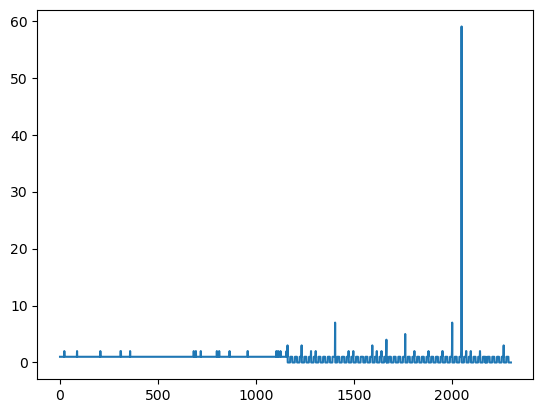

Quantiles for 'Conversion.ran' column:
0.000     0.0
0.050     0.0
0.100     0.0
0.250     0.0
0.500     1.0
0.750     1.0
0.900     1.0
0.950     1.0
0.970     1.0
0.980     1.0
0.990     2.0
0.995     2.0
1.000    59.0
Name: Conversion.ran, dtype: float64


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the data into a DataFrame
CD1 = pd.read_csv('Champion_Data_Historical_Data.csv')  # Replace 'your_data_file.csv' with the actual file name

# Summary of 'Conversion.ran' column
conversion_ran_summary = CD1['Conversion.ran'].describe()
print(conversion_ran_summary)

# Plot the 'Conversion.ran' column
plt.plot(CD1['Conversion.ran'])
plt.show()

# Calculate quantiles for 'Conversion.ran' column
quantiles = CD1['Conversion.ran'].quantile([0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.97, 0.98, 0.99, 0.995, 1])
print("Quantiles for 'Conversion.ran' column:")
print(quantiles)

# Treat outlier values in 'Conversion.ran' column
CD1['Conversion.ran'] = np.where(CD1['Conversion.ran'] > 2.0, 1.0, CD1['Conversion.ran'])

In [42]:
CD1.head(5)

,Month,Location,Budget,CPA,APPT.created,Conversion.ran,APPT.ran,Conversion.close,Orders,Average.ticket,Sales
0,1/1/2015,ALBANY,17931.0,717,25.0,1.0,20.0,0,6.0,4728.0,28366
1,2/1/2015,ALBANY,33143.0,571,58.0,1.0,50.0,0,13.0,12533.0,162931
2,3/1/2015,ALBANY,65600.0,820,80.0,1.0,70.0,0,17.0,12260.0,208416
3,4/1/2015,ALBANY,76460.0,490,156.0,1.0,143.0,0,43.0,7430.0,319473
4,5/1/2015,ALBANY,77819.0,894,87.0,1.0,106.0,0,23.0,12322.0,283405
